# Socioeconomic factors

In their reporting into youth violence,  "A Public Health Approach to Serious Youth Violence: Supporting Evidence" https://data.london.gov.uk/dataset/a-public-health-approach-to-serious-youth-violence, Greater London Authority (GLA) found that the following risk factors were most highly correlated with Serious Youth Violence:
- The rate of first-time entrants into the criminal justice system (aged 10-17)
- The proportion of children living in out-of-work benefit claimant households
- The Index of Multiple Deprivation (IMD) overall average score
- Long-term unemployment as measured by the rate of JSA claims of 1 year or more
- The estimated prevalence of emotional disorders amongst 5-16 year olds
- The estimated prevalence of mental health disorders amongst 5-16 year olds
- The rate of Looked After Children (LAC)
- The estimated prevalence of conduct disorders amongst 5-16 year olds
- The estimated prevalence of hyperkinetic disorders amongst 5-16 year olds
- The rate of conception in mothers under the age of 18
- Educational attainment (GCSE)
- The proportion of residents that feel gangs are a problem in their local area
- The rate of Domestic Violence and Abuse

In 2018 their Centre for Crime and Justice studies report "Young people, violence and knives - revisiting the evidence and policy discussions" - https://www.crimeandjustice.org.uk/publications/young-people-violence-and-knives-revisiting-evidence-and-policy-discussions , Roger Grimshaw and Matt Ford highlight the role of youth mental health and both inequality and absolute deprivation as being correlated with the levels of crime in an area. They also make explicit reference to the levels of children excluded from school and children in care.

In his paper into Inequality And Crime, The Review of Economics and Statistics, Morgan concludes that Inequality has a 'strong and robust impact on violent crime' and while police action is a deterrent to property crime, it had little impact on violent crime. Factors considered by Morgan included gini coefficient (inequality), female head of the family, ethnicity, unemployment, poverty and education.  

IN reviewing the efficacy of predicting policing technology. Wheeler et al (Wheeler, Andrew P. (04/24/2020). "Mapping the Risk Terrain for Crime Using Machine Learning". Journal of quantitative criminology (0748-4518))  considered the following demographic factors: poverty, female headed household, unemployment, moved in prior year, ethnic heterogeneity and proportions of black and hispanic populations, population density.

In viewing this research and the GLA analysis we can see that the characteristics we will need to consider will include deprivation and inequality, unemployment, single parent families, education levels, ethnicity, child mental health, rates of looked after children, exclusions from school and population density. Using these broad categories we will cover all categories considered within the GLA analysis apart from:
- We do not look at rates of entrance to the criminal justice system because we see this as a dependent variable rather than a charachteristic' 
- We do not look into gang membership because, as discussed by Grimshaw and Ford, that while the growth in gang and drug culture are associated with carrying knives, these must be viewed in the context of the wider socioeconomic conditions in an area as they are highly interrelated
- We cannot easily access data relating to conception in mothers under the age of 18 because this data relates to parents of youths perpetrating violent crime and so will span many years. We believe deriving this data would require a level of effort beyond the scope of this project.  

## Data sources

### Deprivation and inequality, unemployment
The UK government produce official statistics relating to deprivation and these can be found at https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019. These indices provide data at LSOA level and are produced as a range of measures including decile, rank and score. We will use score as our measure for deprivation and inequality, unemployment. This is because, as the data providers explain, 'in the case of the Income Deprivation Domain, the Employment Deprivation Domain and the supplementary indices of income deprivation among children and older people, the scores are meaningful and relate to a proportion of the relevant population experiencing that type of deprivation. So, for example, if a Lower-layer Super Output Area has a score of 0.38 in the Income Deprivation Domain, this means that 38 per cent of the population is income deprived in that area'. 

### Single parent families, education levels, ethnicity and population density
Indices of deprivation cannot be used for Education because, as the data provider explains, scores aren't applicable because 'less easy to interpret as they do not relate straightforwardly to the proportion of the population experiencing deprivation. It is recommended that ranks and deciles, but not scores, are used in the case'. Unfortunately, ranking data does not tell us the extent of difference in conditions between the 10th ranked LSOA and the 12th, purely that one is more deprived than the other and so these cannot be reasonably treated as numeric features. For this reason we chose the London Datastore as our source for education data, because it is provided in numeric form. The specific source for this data can be found within 'data atlases' located at https://data.london.gov.uk/dataset/lsoa-atlas and we also use this data as the source for single parent families, ethnicity, population density (and other barriers to housing) data. 

However, it is important to explain that these atlases are based on 2011 census data and so one needs to be cognisant that the data would have been 8 years out of date by 2019, the period for which we collated crime data. This is a concern because it means education and housing data will not include any impacts of policy changes post 2010. For health data we will specifically use child mental health statistics because that is explicity referenced in the GLA analysis.

### Child mental health, rates of looked after children and school exclusions 
This data is only available at borough level rather than LSOA level and will be sourced as follows:
- rates of looked after children: https://www.gov.uk/government/statistics/children-looked-after-in-england-including-adoption-2018-to-2019
- exclusions from school: https://explore-education-statistics.service.gov.uk/find-statistics/permanent-and-fixed-period-exclusions-in-england#dataDownloads-1
- child mental health: Mental health: https://fingertips.phe.org.uk/profile-group/mental-health/profile/cypmh/data#page/0/gid/1938133090/pat/6/par/E12000007/ati/102/are/E09000002/iid/93587/age/221/sex/4/cid/4/tbm/1

### Data consistency
Crime data and indices of deprivation data for income and education are at LSOA level and for the year 2019. The London Atlas data is also at LSOA level, but is based on the 2011 census, which leads to concerns discussed previously. The remaining data is only at borough level, and within that child mental health data is from 2018/2019, looked after children data is from 2019 and exclusions from school is from 2018-19.

In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np

### Load income and employment data from Indices of deprivation

In [45]:
column_names = ['lsoa_code', 'lsoa_name', 'lad_code', 'lad_name', 'income_deprivation_score', 'employment_deprivation_score', 'child_income_deprivation_score']

income_employment_england = pd.read_excel(".\DataSources\Income and Deprivation\File_5_-_IoD2019_Scores.xlsx", 
                                 sheet_name='IoD2019 Scores', usecols = "A:D, F, G, M", names=column_names)

print(income_employment_england.shape)
income_employment_england.head()

(32844, 7)


lsoa_code                  lsoa_name   lad_code              lad_name  \
0  E01000001        City of London 001A  E09000001        City of London   
1  E01000002        City of London 001B  E09000001        City of London   
2  E01000003        City of London 001C  E09000001        City of London   
3  E01000005        City of London 001E  E09000001        City of London   
4  E01000006  Barking and Dagenham 016A  E09000002  Barking and Dagenham   

   income_deprivation_score  employment_deprivation_score  \
0                     0.007                         0.010   
1                     0.034                         0.027   
2                     0.086                         0.086   
3                     0.211                         0.136   
4                     0.117                         0.059   

   child_income_deprivation_score  
0                           0.006  
1                           0.037  
2                           0.052  
3                           0.209  
4                           0.155

In [46]:
income_employment_england = income_employment_england.dropna(how='all') # only drops a row when every column is NA
print(income_employment_england.shape)

# Now check for NaN values
nan_values = income_employment_england[income_employment_england.isna().any(axis=1)]
nan_values

(32844, 7)


Empty DataFrame
Columns: [lsoa_code, lsoa_name, lad_code, lad_name, income_deprivation_score, employment_deprivation_score, child_income_deprivation_score]
Index: []

### London data atlas
#### Source data manipulation
I had problems loading the original source data and to resolve it I created new tabs, copied the data and removed the headers rows. The new tabs created were as follows:
- data_1 - iadatasheet1
- data_2 - iadatasheet2

In [47]:
column_names = ['lsoa_code', 'lsoa_name', 'population_density', 'lone_parent_pct', 'ethnic_white_pct', 
                'ethnic_mixed_pct', 'ethnic_asian_pct', 'ethnic_black_pct', 
                'ethnic_other_pct', 'homeowner_outright_pct', 'homeowner_mortgage_pct', 'rent_social_pct',
                'rent_private_pct', 'median_house_price']

london_atlas_sheet1 = pd.read_excel(".\DataSources\Income and Deprivation\london_data_atlas_lsoa.xls", 
                                 sheet_name='data_1', header=None,
                                 usecols = "A, B, CY, DH, DQ:DU, FA, FB, FC, FD, FW", 
                                 names=column_names)


print(london_atlas_sheet1.shape)
london_atlas_sheet1.head()

(4835, 14)


lsoa_code    lsoa_name  population_density  lone_parent_pct  \
0  E01000907  Camden 001A          136.753731        21.052632   
1  E01000908  Camden 001B           94.114286        13.180169   
2  E01000909  Camden 001C           71.828521         7.261725   
3  E01000912  Camden 001D           18.446602        15.714286   
4  E01000913  Camden 001E           11.298701         3.739612   

   ethnic_white_pct  ethnic_mixed_pct  ethnic_asian_pct  ethnic_black_pct  \
0         73.496503          7.272727          8.531469          7.902098   
1         72.422517          8.665402          6.198608          8.032891   
2         84.076828          5.514250          4.646840          2.850062   
3         77.344242          5.601007          5.097546          9.188169   
4         88.187135          5.087719          4.736842          1.286550   

   ethnic_other_pct  homeowner_outright_pct  homeowner_mortgage_pct  \
0          2.797203                    12.6                    18.0   
1          4.680582                    14.0                    17.7   
2          2.912020                    38.3                    21.2   
3          2.769037                    15.3                    14.6   
4          0.701754                    47.1                    27.6   

   rent_social_pct  rent_private_pct median_house_price  
0             54.4              13.7             568500  
1             52.6              14.0             350000  
2             18.6              18.8            1412500  
3             51.3              15.0             725000  
4              1.9              19.4             996585

In [48]:
column_names_ = ['lsoa_code', 'no_qualifications_pct', 'degree_educated_pct']

london_atlas_sheet2 = pd.read_excel(".\DataSources\Income and Deprivation\london_data_atlas_lsoa.xls", 
                                 sheet_name='data_2', header=None,
                                 usecols = "A, X, AC", 
                                 names=column_names_)


print(london_atlas_sheet2.shape)
london_atlas_sheet2.head()

(4835, 3)


lsoa_code  no_qualifications_pct  degree_educated_pct
0  E01000907                   20.0                 44.2
1  E01000908                   15.0                 50.4
2  E01000909                    9.6                 61.9
3  E01000912                   18.0                 47.2
4  E01000913                    4.9                 65.2

In [49]:
london_atlas_raw = pd.merge(london_atlas_sheet1, london_atlas_sheet2, left_on='lsoa_code', 
                            right_on='lsoa_code', how = 'inner')

print(london_atlas_raw.shape)
london_atlas_raw.head()

(4835, 16)


lsoa_code    lsoa_name  population_density  lone_parent_pct  \
0  E01000907  Camden 001A          136.753731        21.052632   
1  E01000908  Camden 001B           94.114286        13.180169   
2  E01000909  Camden 001C           71.828521         7.261725   
3  E01000912  Camden 001D           18.446602        15.714286   
4  E01000913  Camden 001E           11.298701         3.739612   

   ethnic_white_pct  ethnic_mixed_pct  ethnic_asian_pct  ethnic_black_pct  \
0         73.496503          7.272727          8.531469          7.902098   
1         72.422517          8.665402          6.198608          8.032891   
2         84.076828          5.514250          4.646840          2.850062   
3         77.344242          5.601007          5.097546          9.188169   
4         88.187135          5.087719          4.736842          1.286550   

   ethnic_other_pct  homeowner_outright_pct  homeowner_mortgage_pct  \
0          2.797203                    12.6                    18.0   
1          4.680582                    14.0                    17.7   
2          2.912020                    38.3                    21.2   
3          2.769037                    15.3                    14.6   
4          0.701754                    47.1                    27.6   

   rent_social_pct  rent_private_pct median_house_price  \
0             54.4              13.7             568500   
1             52.6              14.0             350000   
2             18.6              18.8            1412500   
3             51.3              15.0             725000   
4              1.9              19.4             996585   

   no_qualifications_pct  degree_educated_pct  
0                   20.0                 44.2  
1                   15.0                 50.4  
2                    9.6                 61.9  
3                   18.0                 47.2  
4                    4.9                 65.2

In [50]:
london_atlas_raw = london_atlas_raw.dropna(how='all') # only drops a row when every column is NA
print(london_atlas_raw.shape)

# Now check for NaN values
nan_values = london_atlas_raw[london_atlas_raw.isna().any(axis=1)]
nan_values

(4835, 16)


Empty DataFrame
Columns: [lsoa_code, lsoa_name, population_density, lone_parent_pct, ethnic_white_pct, ethnic_mixed_pct, ethnic_asian_pct, ethnic_black_pct, ethnic_other_pct, homeowner_outright_pct, homeowner_mortgage_pct, rent_social_pct, rent_private_pct, median_house_price, no_qualifications_pct, degree_educated_pct]
Index: []

In [51]:
column_names = london_atlas_raw.columns.to_list()
column_names

['lsoa_code',
 'lsoa_name',
 'population_density',
 'lone_parent_pct',
 'ethnic_white_pct',
 'ethnic_mixed_pct',
 'ethnic_asian_pct',
 'ethnic_black_pct',
 'ethnic_other_pct',
 'homeowner_outright_pct',
 'homeowner_mortgage_pct',
 'rent_social_pct',
 'rent_private_pct',
 'median_house_price',
 'no_qualifications_pct',
 'degree_educated_pct']

In [52]:
pct_fields = [ 'lone_parent_pct',
 'ethnic_white_pct',
 'ethnic_mixed_pct',
 'ethnic_asian_pct',
 'ethnic_black_pct',
 'ethnic_other_pct',
 'homeowner_outright_pct',
 'homeowner_mortgage_pct',
 'rent_social_pct',
 'rent_private_pct',
 'no_qualifications_pct',
 'degree_educated_pct']

other_numeric_fields = ['population_density', 'median_house_price']

all_numeric_fields = pct_fields + other_numeric_fields

numeric_fields_df = london_atlas_raw[all_numeric_fields].apply(pd.to_numeric,errors='coerce')

# Now check for NaN values

nan_values_ = numeric_fields_df[numeric_fields_df.isna().any(axis=1)]
print(nan_values_.shape)
print("\nfields with nan_values\n")
nan_values_

(2, 14)

fields with nan_values



lone_parent_pct  ethnic_white_pct  ethnic_mixed_pct  ethnic_asian_pct  \
1347        21.142857         25.468425          8.258154         11.797363   
2872        27.366609         63.912201          7.101356          2.840542   

      ethnic_black_pct  ethnic_other_pct  homeowner_outright_pct  \
1347         50.242887          4.233171                     4.4   
2872         24.531956          1.613944                    10.7   

      homeowner_mortgage_pct  rent_social_pct  rent_private_pct  \
1347                     5.5             80.8               8.2   
2872                    16.9             67.3               4.6   

      no_qualifications_pct  degree_educated_pct  population_density  \
1347                   25.4                 23.9          274.108818   
2872                   37.0                 11.6           60.281470   

      median_house_price  
1347                 NaN  
2872                 NaN

### Comments
The following numeric fields need dealing with:
- 1347 - Southwark 015C - just set to median_house_price from prior year - 156000
- 2872 - Croydon 030A - just set to median_house_price from prior year - 161000

Then after that, convert percent fields thyrough dividing by 100, standard scale the population density, house price and income fields and then create a tidy dataframe prior to reviewing data distributions.

In [53]:
london_atlas = london_atlas_raw[['lsoa_code', 'lsoa_name']]
london_atlas = london_atlas.join(numeric_fields_df)
print(london_atlas.shape)

london_atlas.loc[london_atlas.lsoa_name == 'Southwark 015C', 'median_house_price'] = 156000
london_atlas.loc[london_atlas.lsoa_name == 'Croydon 030A', 'median_house_price'] = 161000
                  
print(london_atlas.shape)
london_atlas[london_atlas.lsoa_name.isin(['Croydon 030A', 'Southwark 015C']) ]

(4835, 16)
(4835, 16)


lsoa_code       lsoa_name  lone_parent_pct  ethnic_white_pct  \
1347  E01003968  Southwark 015C        21.142857         25.468425   
2872  E01001051    Croydon 030A        27.366609         63.912201   

      ethnic_mixed_pct  ethnic_asian_pct  ethnic_black_pct  ethnic_other_pct  \
1347          8.258154         11.797363         50.242887          4.233171   
2872          7.101356          2.840542         24.531956          1.613944   

      homeowner_outright_pct  homeowner_mortgage_pct  rent_social_pct  \
1347                     4.4                     5.5             80.8   
2872                    10.7                    16.9             67.3   

      rent_private_pct  no_qualifications_pct  degree_educated_pct  \
1347               8.2                   25.4                 23.9   
2872               4.6                   37.0                 11.6   

      population_density  median_house_price  
1347          274.108818            156000.0  
2872           60.281470            161000.0

In [54]:
from sklearn.preprocessing import MinMaxScaler

london_atlas_wide = london_atlas[['lsoa_code', 'lsoa_name']]
df_pct_fields = london_atlas[pct_fields].div(100)
df_numeric = london_atlas[other_numeric_fields]

minmax = MinMaxScaler()
minmax = minmax.fit(df_numeric)
numeric_ss = minmax.transform(df_numeric)

df_numeric_ss = pd.DataFrame(numeric_ss, columns=other_numeric_fields)

london_atlas_wide = london_atlas_wide.join(df_pct_fields)
london_atlas_wide = london_atlas_wide.join(df_numeric_ss)
print(london_atlas_wide.shape)
london_atlas_wide.head()

(4835, 16)


lsoa_code    lsoa_name  lone_parent_pct  ethnic_white_pct  \
0  E01000907  Camden 001A         0.210526          0.734965   
1  E01000908  Camden 001B         0.131802          0.724225   
2  E01000909  Camden 001C         0.072617          0.840768   
3  E01000912  Camden 001D         0.157143          0.773442   
4  E01000913  Camden 001E         0.037396          0.881871   

   ethnic_mixed_pct  ethnic_asian_pct  ethnic_black_pct  ethnic_other_pct  \
0          0.072727          0.085315          0.079021          0.027972   
1          0.086654          0.061986          0.080329          0.046806   
2          0.055143          0.046468          0.028501          0.029120   
3          0.056010          0.050975          0.091882          0.027690   
4          0.050877          0.047368          0.012865          0.007018   

   homeowner_outright_pct  homeowner_mortgage_pct  rent_social_pct  \
0                   0.126                   0.180            0.544   
1                   0.140                   0.177            0.526   
2                   0.383                   0.212            0.186   
3                   0.153                   0.146            0.513   
4                   0.471                   0.276            0.019   

   rent_private_pct  no_qualifications_pct  degree_educated_pct  \
0             0.137                  0.200                0.442   
1             0.140                  0.150                0.504   
2             0.188                  0.096                0.619   
3             0.150                  0.180                0.472   
4             0.194                  0.049                0.652   

   population_density  median_house_price  
0            0.168999            0.099591  
1            0.115812            0.052541  
2            0.088014            0.281331  
3            0.021427            0.133290  
4            0.012511            0.191771

### Now merge with indices data

In [55]:
london_features = pd.merge(income_employment_england, london_atlas_wide, left_on='lsoa_code', 
                            right_on='lsoa_code', how = 'inner')

london_features.rename(columns = {'lsoa_name_x':'lsoa_name'}, inplace = True)
london_features.drop('lsoa_name_y', axis=1, inplace=True)

print(london_features.shape)
london_features.head()

(4835, 21)


lsoa_code                  lsoa_name   lad_code              lad_name  \
0  E01000001        City of London 001A  E09000001        City of London   
1  E01000002        City of London 001B  E09000001        City of London   
2  E01000003        City of London 001C  E09000001        City of London   
3  E01000005        City of London 001E  E09000001        City of London   
4  E01000006  Barking and Dagenham 016A  E09000002  Barking and Dagenham   

   income_deprivation_score  employment_deprivation_score  \
0                     0.007                         0.010   
1                     0.034                         0.027   
2                     0.086                         0.086   
3                     0.211                         0.136   
4                     0.117                         0.059   

   child_income_deprivation_score  lone_parent_pct  ethnic_white_pct  \
0                           0.006         0.026256          0.845051   
1                           0.037         0.026506          0.887187   
2                           0.052         0.059976          0.783804   
3                           0.209         0.094218          0.513706   
4                           0.155         0.099448          0.327070   

   ethnic_mixed_pct  ...  ethnic_black_pct  ethnic_other_pct  \
0          0.036860  ...          0.007509          0.023208   
1          0.037604  ...          0.002786          0.006267   
2          0.040862  ...          0.033432          0.017088   
3          0.059898  ...          0.101523          0.046701   
4          0.034058  ...          0.103934          0.029360   

   homeowner_outright_pct  homeowner_mortgage_pct  rent_social_pct  \
0                   0.405                   0.203            0.047   
1                   0.378                   0.257            0.058   
2                   0.225                   0.175            0.361   
3                   0.051                   0.047            0.668   
4                   0.250                   0.385            0.033   

   rent_private_pct  no_qualifications_pct  degree_educated_pct  \
0             0.301                  0.019                0.776   
1             0.264                  0.023                0.792   
2             0.217                  0.130                0.568   
3             0.216                  0.244                0.345   
4             0.328                  0.182                0.329   

   population_density  median_house_price  
0            0.140067            0.132214  
1            0.077879            0.157300  
2            0.284826            0.082149  
3            0.075522            0.066430  
4            0.144255            0.034776  

[5 rows x 21 columns]

In [56]:
super_numeric_fields = ['income_deprivation_score', 'employment_deprivation_score', 'child_income_deprivation_score'] + all_numeric_fields

london_features_tidy = pd.melt(london_features, id_vars=['lsoa_code', 'lsoa_name', 'lad_code', 'lad_name'], 
                        value_vars=super_numeric_fields, var_name = 'feature', value_name='value')

london_features_tidy.head()

lsoa_code                  lsoa_name   lad_code              lad_name  \
0  E01000001        City of London 001A  E09000001        City of London   
1  E01000002        City of London 001B  E09000001        City of London   
2  E01000003        City of London 001C  E09000001        City of London   
3  E01000005        City of London 001E  E09000001        City of London   
4  E01000006  Barking and Dagenham 016A  E09000002  Barking and Dagenham   

                    feature  value  
0  income_deprivation_score  0.007  
1  income_deprivation_score  0.034  
2  income_deprivation_score  0.086  
3  income_deprivation_score  0.211  
4  income_deprivation_score  0.117

## Distributional analysis
We will perform the following broad steps
1. Assess distribution
    - Use histograms to review the distribution for each feature to check for normality, skewness and evidence of bi or multi modality within the data
    - if we identify skewness, then plot historograms for log distributions to see whether that addresses the skewness
    - if we identify multi modes within the data then review further as part of our outlier analysis 
2. Analyse outliers
    - use boxplots to get an overview of distributions and outliers and also create reports of all values falling outside mean +/- 2.5 standard deviations to assess the extent of the outliers. 
    - fix outliers which have arisen erroneously, but look at different strategies (e.g. using 'robust' statistics) if the outliers actually reveal important informaton about our locations and distributions
3. Define strategy for outliers and distribution
    - We will discuss our approach to subsequent inferential statistics based on our findings
    
    
It is important to note that dealing with outliers will affect distributions and transforming distributions will have an effect on outliers and so the two approaches work hand in hand. It is also important to note that creating log distributions can resolve issues with low values but do skew the results for high values. This means we will only use a log transformation when it materially improves the skewness and so the default position is to use the original data values.
    
### Use Histograms to review the distributions
n.b. We create two batches of histograms to ease scrolling

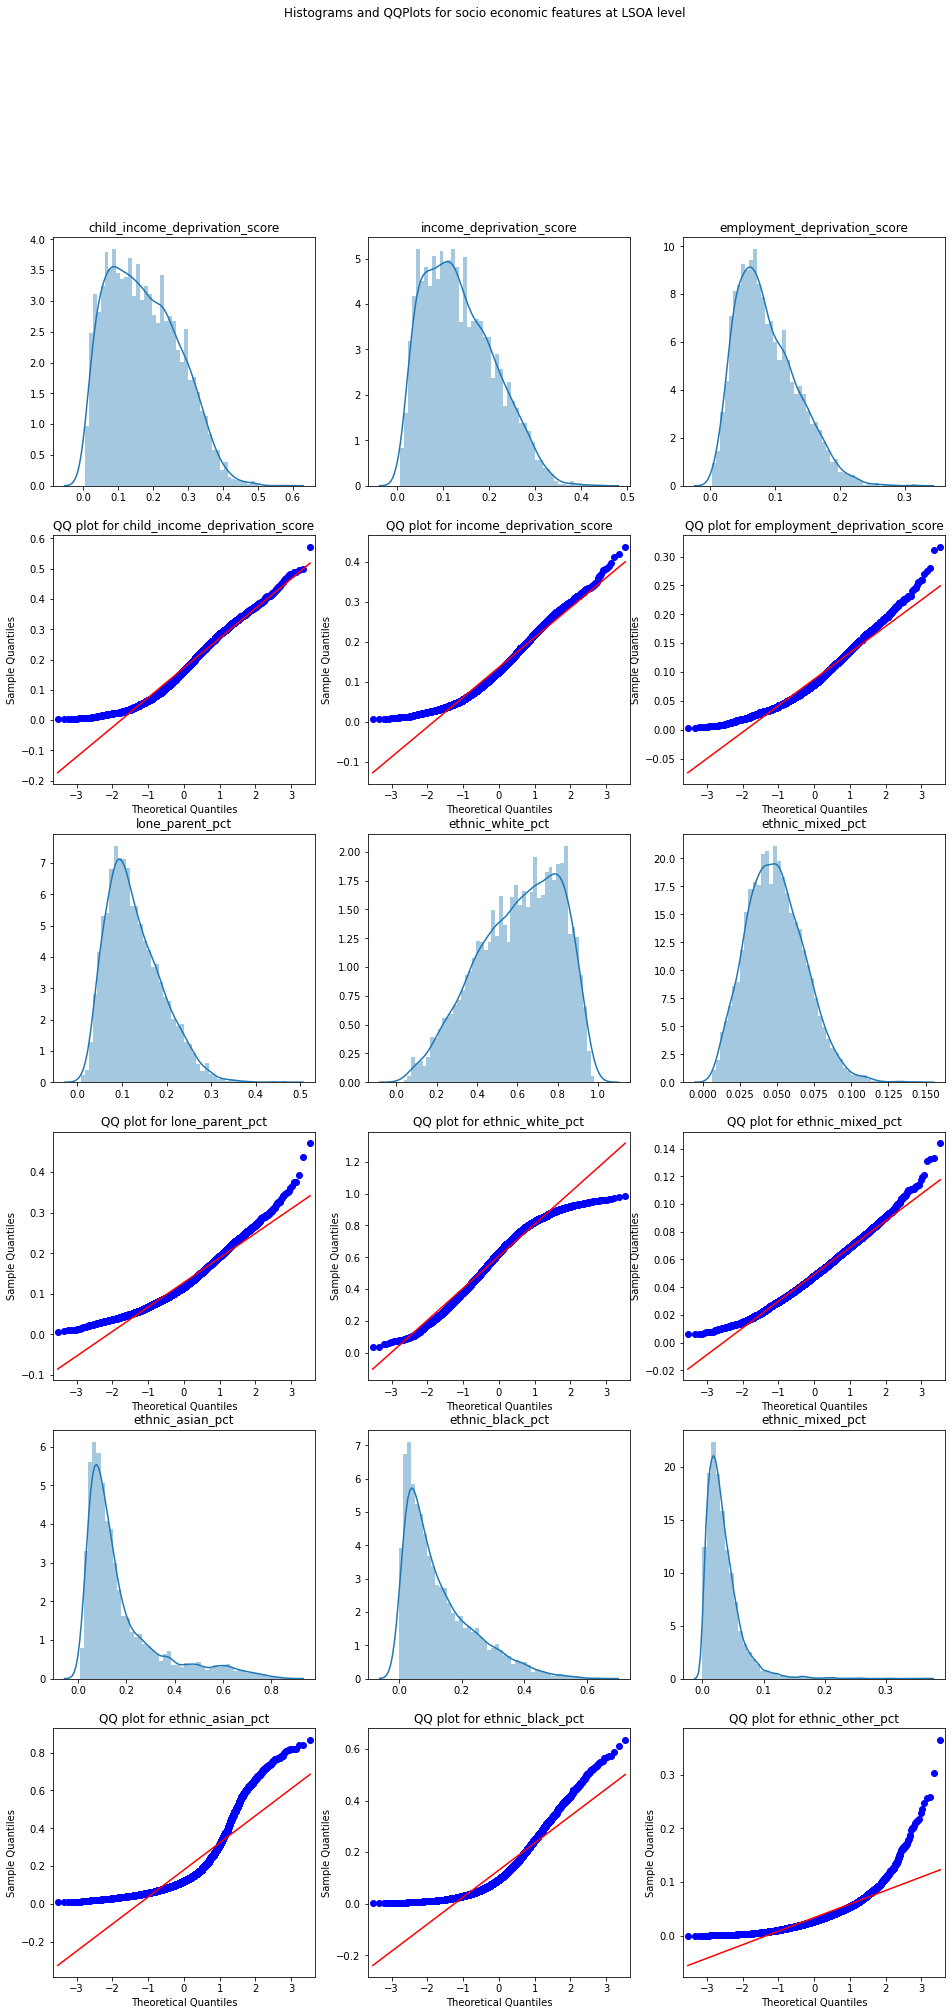

In [57]:
f, axes = plt.subplots(6, 3, figsize=(16,32))
f.suptitle('Histograms and QQPlots for socio economic features at LSOA level')
sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='child_income_deprivation_score']), bins=50, ax=axes[0,0])
axes[0,0].set_title('child_income_deprivation_score')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='child_income_deprivation_score']), line='r', ax=axes[1,0])
axes[1,0].set_title('QQ plot for child_income_deprivation_score')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='income_deprivation_score']), bins=50, ax=axes[0,1])
axes[0,1].set_title('income_deprivation_score')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='income_deprivation_score']), line='r', ax=axes[1,1])
axes[1,1].set_title('QQ plot for income_deprivation_score')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='employment_deprivation_score']), bins=50, ax=axes[0,2])
axes[0,2].set_title('employment_deprivation_score')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='employment_deprivation_score']), line='r', ax=axes[1,2])
axes[1,2].set_title('QQ plot for employment_deprivation_score')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='lone_parent_pct']), bins=50, ax=axes[2,0])
axes[2,0].set_title('lone_parent_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='lone_parent_pct']), line='r', ax=axes[3,0])
axes[3,0].set_title('QQ plot for lone_parent_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_white_pct']), bins=50, ax=axes[2,1])
axes[2,1].set_title('ethnic_white_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_white_pct']), line='r', ax=axes[3,1])
axes[3,1].set_title('QQ plot for ethnic_white_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_mixed_pct']), bins=50, ax=axes[2,2])
axes[2,2].set_title('ethnic_mixed_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_mixed_pct']), line='r', ax=axes[3,2])
axes[3,2].set_title('QQ plot for ethnic_mixed_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_asian_pct']), bins=50, ax=axes[4,0])
axes[4,0].set_title('ethnic_asian_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_asian_pct']), line='r', ax=axes[5,0])
axes[5,0].set_title('QQ plot for ethnic_asian_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_black_pct']), bins=50, ax=axes[4,1])
axes[4,1].set_title('ethnic_black_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_black_pct']), line='r', ax=axes[5,1])
axes[5,1].set_title('QQ plot for ethnic_black_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_other_pct']), bins=50, ax=axes[4,2])
axes[4,2].set_title('ethnic_mixed_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_other_pct']), line='r', ax=axes[5,2])
axes[5,2].set_title('QQ plot for ethnic_other_pct')

plt.show()

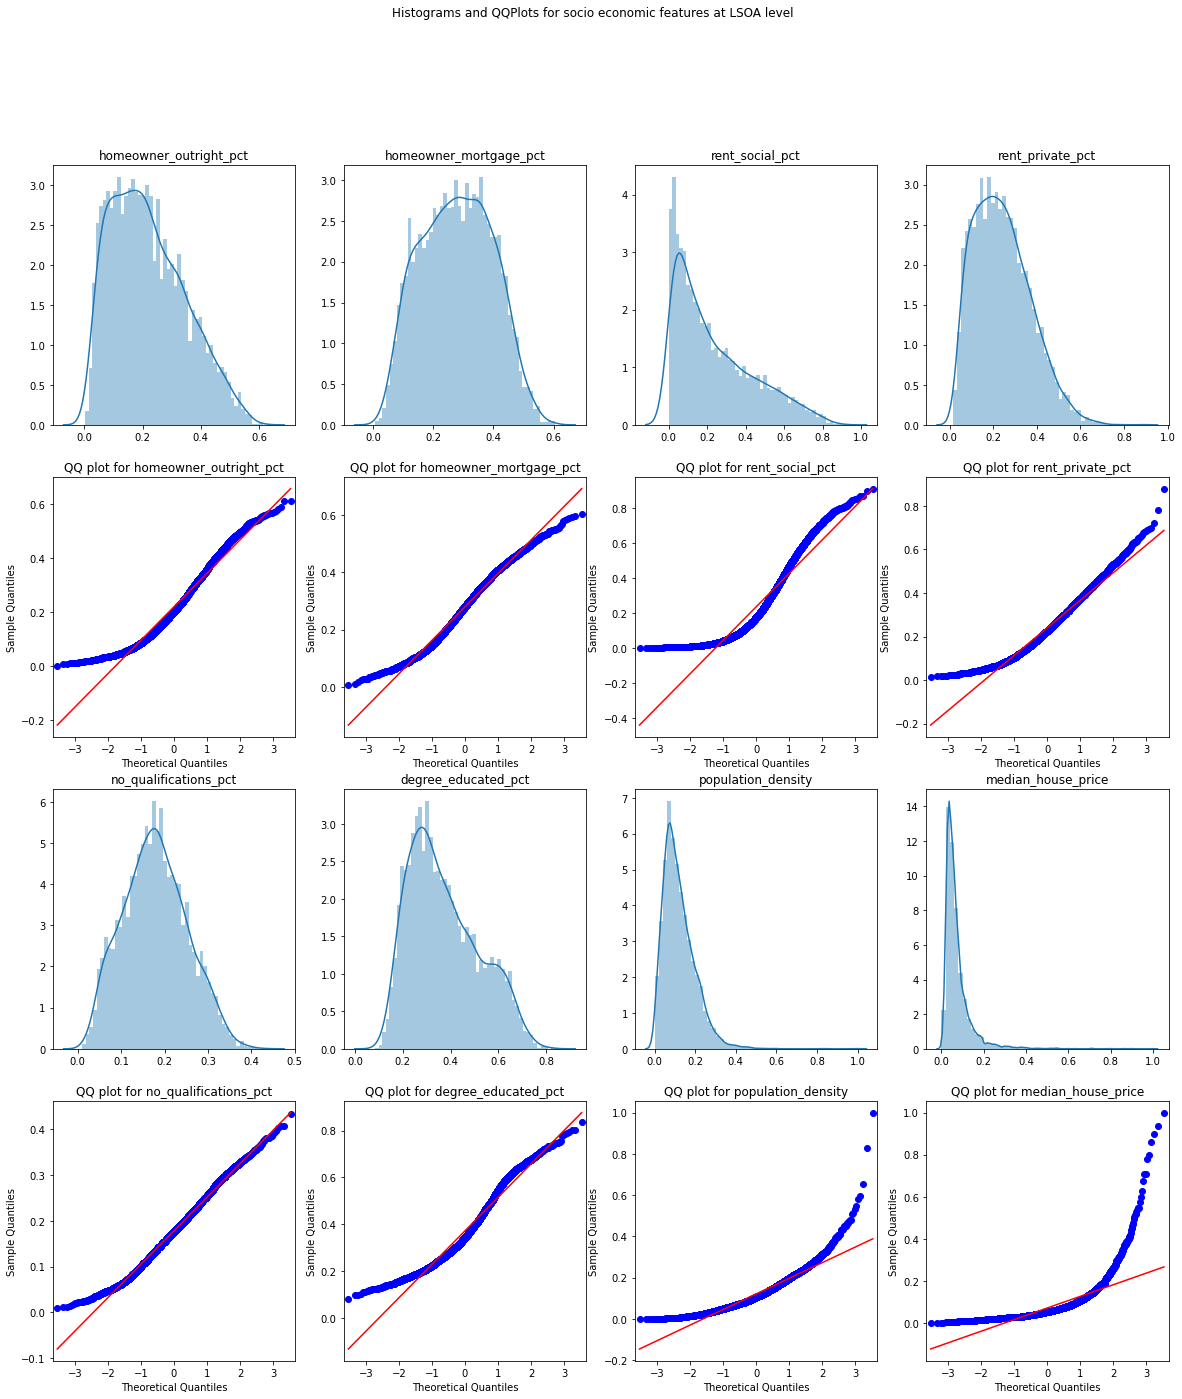

In [58]:
f, axes = plt.subplots(4, 4, figsize=(20,22))
f.suptitle('Histograms and QQPlots for socio economic features at LSOA level')
sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='homeowner_outright_pct']), bins=50, ax=axes[0,0])
axes[0,0].set_title('homeowner_outright_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='homeowner_outright_pct']), line='r', ax=axes[1,0])
axes[1,0].set_title('QQ plot for homeowner_outright_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='homeowner_mortgage_pct']), bins=50, ax=axes[0,1])
axes[0,1].set_title('homeowner_mortgage_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='homeowner_mortgage_pct']), line='r', ax=axes[1,1])
axes[1,1].set_title('QQ plot for homeowner_mortgage_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='rent_social_pct']), bins=50, ax=axes[0,2])
axes[0,2].set_title('rent_social_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='rent_social_pct']), line='r', ax=axes[1,2])
axes[1,2].set_title('QQ plot for rent_social_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='rent_private_pct']), bins=50, ax=axes[0,3])
axes[0,3].set_title('rent_private_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='rent_private_pct']), line='r', ax=axes[1,3])
axes[1,3].set_title('QQ plot for rent_private_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='no_qualifications_pct']), bins=50, ax=axes[2,0])
axes[2,0].set_title('no_qualifications_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='no_qualifications_pct']), line='r', ax=axes[3,0])
axes[3,0].set_title('QQ plot for no_qualifications_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='degree_educated_pct']), bins=50, ax=axes[2,1])
axes[2,1].set_title('degree_educated_pct')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='degree_educated_pct']), line='r', ax=axes[3,1])
axes[3,1].set_title('QQ plot for degree_educated_pct')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='population_density']), bins=50, ax=axes[2,2])
axes[2,2].set_title('population_density')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='population_density']), line='r', ax=axes[3,2])
axes[3,2].set_title('QQ plot for population_density')

sns.distplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='median_house_price']), bins=50, ax=axes[2,3])
axes[2,3].set_title('median_house_price')
sm.qqplot(np.array(london_features_tidy['value'][london_features_tidy.feature=='median_house_price']), line='r', ax=axes[3,3])
axes[3,3].set_title('QQ plot for median_house_price')

plt.show()

### Comments on distributions
We can see that there is some degree of skew in most of our distributions, but the distributions where it is most pronounced, and hence we will review their log distributions, are as follows:
- ethic_asian_pct
- ethnic_black_pct
- ethnic_other
- rent_social_pct
- population_density
- median_house_price

However, on the positive side there is no material multi modality and where it does exist (degree_educated_pct, ethnic_asian_pct), it is slight and so we do not propose any material transformation beyond that proposed for dealing with outliers. 

Now we will review log distributions but first we need to transform data for ethnic_other, rent_social band, population_density (Enfield - missing data?) and median_house_price (Bexley 008B) as they contain zero values, for which we cannot derive a log value. For these features we will set a zero value to the minimum value

In [59]:
print(london_features_tidy[(london_features_tidy.feature == 'population_density') &
                                            (london_features_tidy.value == 0)])

print(london_features_tidy[(london_features_tidy.feature == 'median_house_price') &
                                            (london_features_tidy.value == 0)])

       lsoa_code     lsoa_name   lad_code lad_name             feature  value
73916  E01001412  Enfield 004C  E09000010  Enfield  population_density    0.0
       lsoa_code    lsoa_name   lad_code lad_name             feature  value
77783  E01000429  Bexley 008B  E09000004   Bexley  median_house_price    0.0


In [60]:
min_val_rent = london_features_tidy['value'][(london_features_tidy.feature == 'rent_social_pct') &
                                            (london_features_tidy.value > 0)].min()
min_val_ethnic = london_features_tidy['value'][(london_features_tidy.feature == 'ethnic_other_pct') &
                                            (london_features_tidy.value > 0)].min()
min_pop = london_features_tidy['value'][(london_features_tidy.feature == 'population_density') &
                                            (london_features_tidy.value > 0)].min()
min_house = london_features_tidy['value'][(london_features_tidy.feature == 'median_house_price') &
                                            (london_features_tidy.value > 0)].min()

london_features_tidy.loc[(london_features_tidy.feature == 'rent_social_pct') &
                                            (london_features_tidy.value == 0), "value"] = min_val_rent
london_features_tidy.loc[(london_features_tidy.feature == 'ethnic_other_pct') &
                                            (london_features_tidy.value == 0), "value"] = min_val_ethnic
london_features_tidy.loc[(london_features_tidy.feature == 'population_density') &
                                            (london_features_tidy.value == 0), "value"] = min_pop
london_features_tidy.loc[(london_features_tidy.feature == 'median_house_price') &
                                            (london_features_tidy.value == 0), "value"] = min_house

min_val_rent, min_val_ethnic, min_pop, min_house

(0.002, 0.0006013229104028864, 4.490639972569519e-07, 0.0007536606373815674)

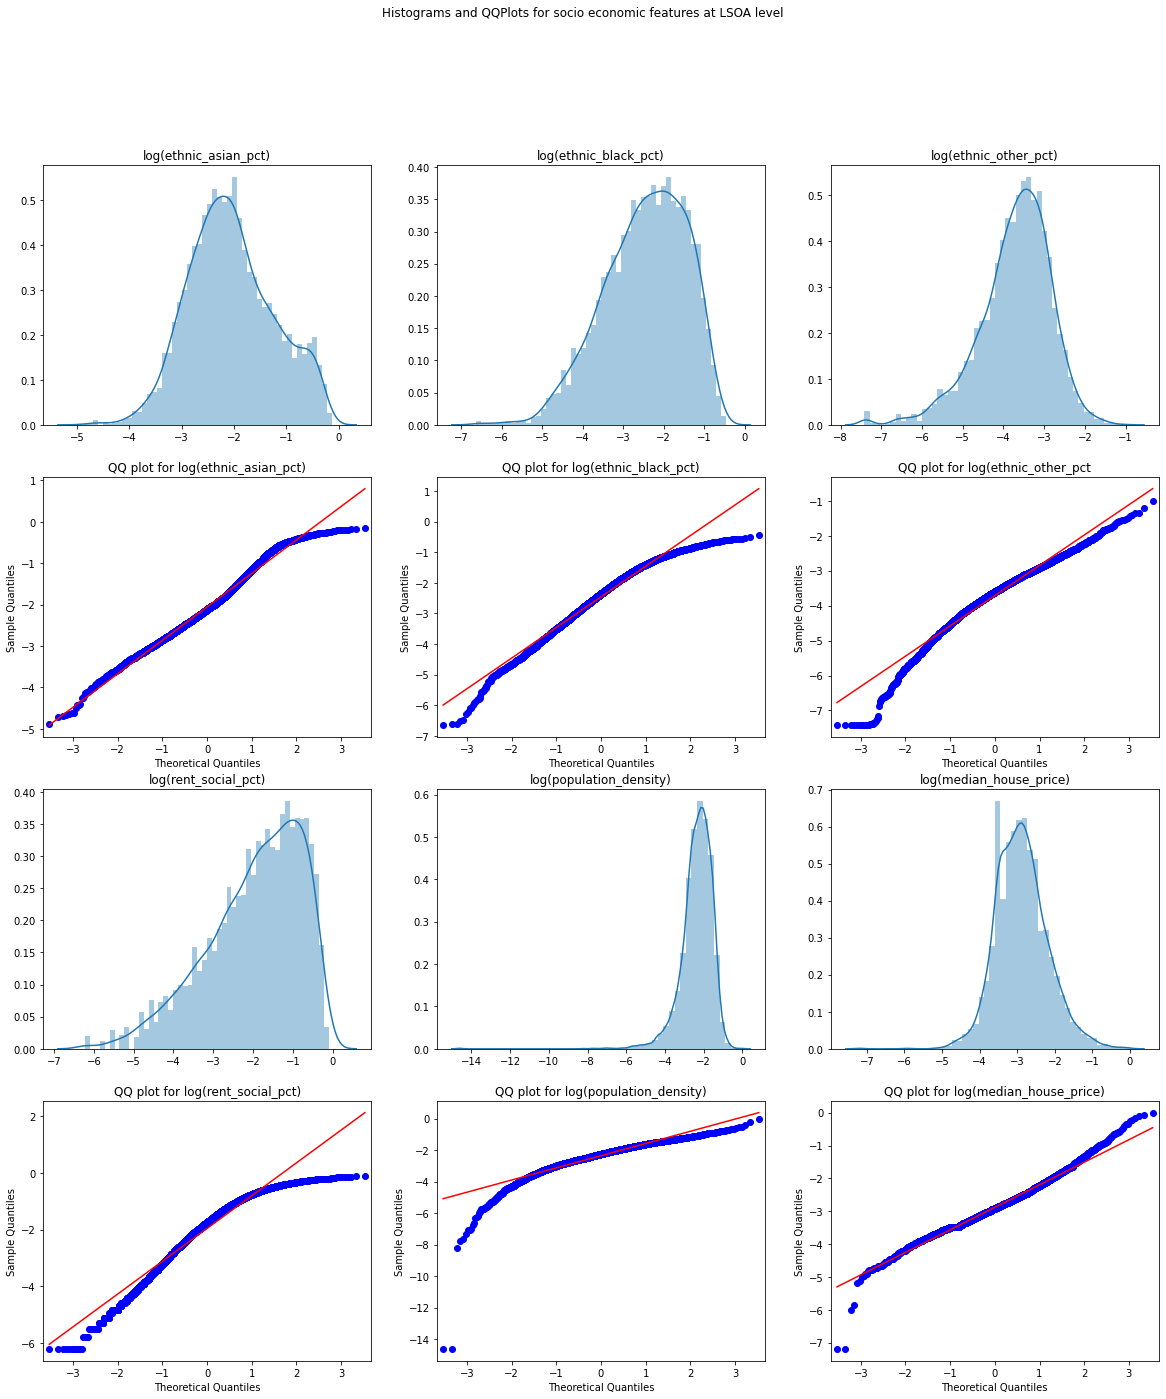

In [61]:
f, axes = plt.subplots(4, 3, figsize=(20,22))
f.suptitle('Histograms and QQPlots for socio economic features at LSOA level')
sns.distplot(np.array(np.log(london_features_tidy['value'][london_features_tidy.feature=='ethnic_asian_pct'])), bins=50, ax=axes[0,0])
axes[0,0].set_title('log(ethnic_asian_pct)')
sm.qqplot(np.log(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_asian_pct'])), line='r', ax=axes[1,0])
axes[1,0].set_title('QQ plot for log(ethnic_asian_pct)')

sns.distplot(np.array(np.log(london_features_tidy['value'][london_features_tidy.feature=='ethnic_black_pct'])), bins=50, ax=axes[0,1])
axes[0,1].set_title('log(ethnic_black_pct)')
sm.qqplot(np.array(np.log(london_features_tidy['value'][london_features_tidy.feature=='ethnic_black_pct'])), line='r', ax=axes[1,1])
axes[1,1].set_title('QQ plot for log(ethnic_black_pct)')

sns.distplot(np.log(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_other_pct'])), bins=50, ax=axes[0,2])
axes[0,2].set_title('log(ethnic_other_pct)')
sm.qqplot(np.log(np.array(london_features_tidy['value'][london_features_tidy.feature=='ethnic_other_pct'])), line='r', ax=axes[1,2])
axes[1,2].set_title('QQ plot for log(ethnic_other_pct')

sns.distplot(np.log(np.array(london_features_tidy['value'][london_features_tidy.feature=='rent_social_pct'])), bins=50, ax=axes[2,0])
axes[2,0].set_title('log(rent_social_pct)')
sm.qqplot(np.log(np.array(london_features_tidy['value'][london_features_tidy.feature=='rent_social_pct'])), line='r', ax=axes[3,0])
axes[3,0].set_title('QQ plot for log(rent_social_pct)')

sns.distplot(np.log(np.array(london_features_tidy['value'][london_features_tidy.feature=='population_density'])), bins=50, ax=axes[2,1])
axes[2,1].set_title('log(population_density)')
sm.qqplot(np.log(np.array(london_features_tidy['value'][london_features_tidy.feature=='population_density'])), line='r', ax=axes[3,1])
axes[3,1].set_title('QQ plot for log(population_density)')

sns.distplot(np.log(np.array(london_features_tidy['value'][london_features_tidy.feature=='median_house_price'])), bins=50, ax=axes[2,2])
axes[2,2].set_title('log(median_house_price)')
sm.qqplot(np.log(np.array(london_features_tidy['value'][london_features_tidy.feature=='median_house_price'])), line='r', ax=axes[3,2])
axes[3,2].set_title('QQ plot for log(median_house_price)')

plt.show()

### Comments
There is a material improvement in distribution for ethnic_asian_pct, asian_black_pct, asian_other_pct and median_house_price and it is worth using the log values in these cases. Howvere, it is more of a marginal decision for rent_social_pct and population_density but we will considere using log values for these features at the moment.

### Outlier analysis
We will first use box plots to get an overview of the outliers and then drill into specific features to understand their extent and also whether we need to prune them.

In [62]:
import plotly.express as px
fig = px.box(london_features_tidy, x="feature", y="value")
fig.show()

### Comments 
As expected, the features with the highest number of outliers are also those whose distribution exhibited the greatest amount of skew. We will now get specific statistics for these outliers by reporting the number which fall outside median + 2 standard deviations

In [67]:
def get_outliers(london_features_tidy):
    # Now produce distributions
    all_features = london_features_tidy['feature'].unique()
    london_features_tidy['Median'] = 0
    london_features_tidy['STD'] = 0
    london_features_tidy['Plus3SD'] = 0
    london_features_tidy['Minus3SD'] = 0
    london_features_tidy['Upper'] = 0
    london_features_tidy['Lower'] = 0
    london_features_tidy['outlier_upper'] = 0
    london_features_tidy['outlier_lower'] = 0
    

    for this_feature in all_features:
                        
        feature_median = london_features_tidy['value'][london_features_tidy.feature == this_feature].median()
        feature_std = london_features_tidy['value'][london_features_tidy.feature == this_feature].std()
        feature_upper = feature_median + 2.5 * feature_std;
        feature_lower = feature_median - 2.5 * feature_std;
       
        london_features_tidy.loc[london_features_tidy.feature == this_feature, "Mean"] = feature_median
        london_features_tidy.loc[london_features_tidy.feature == this_feature, "STD"] = feature_std
        london_features_tidy.loc[london_features_tidy.feature == this_feature, "Upper"] = feature_upper
        london_features_tidy.loc[london_features_tidy.feature == this_feature, "Lower"] = feature_lower
        
        london_features_tidy.loc[(london_features_tidy.feature == this_feature) & (london_features_tidy.value > feature_upper), "outlier_upper"] = 1
        london_features_tidy.loc[(london_features_tidy.feature == this_feature) & (london_features_tidy.value < feature_lower), "outlier_lower"] = 1

    london_features_tidy.drop(['Median','STD','Plus3SD', 'Minus3SD', 'Upper', 'Lower'], axis=1, inplace=True)
    
    outliers = london_features_tidy[(london_features_tidy.outlier_upper==1) | (london_features_tidy.outlier_lower==1)]
    
    return outliers

outliers = get_outliers(london_features_tidy)

In [73]:
print("Total number of feature rows = {0:} \n".format(london_features_tidy.feature.count()))

print("Total number of outliers = {0:} \n".format(outliers.outlier_lower.count()))

print("Outlier totals by feature type")

outliers_totals = outliers.groupby(['feature']).agg({'outlier_upper':'sum','outlier_lower':'sum'}).reset_index()
outliers_totals

Total number of feature rows = 82195 

Total number of outliers = 1768 

Outlier totals by feature type


feature  outlier_upper  outlier_lower
0   child_income_deprivation_score             39              0
1              degree_educated_pct             54              0
2     employment_deprivation_score             99              0
3                 ethnic_asian_pct            308              0
4                 ethnic_black_pct            213              0
5                 ethnic_mixed_pct             59              0
6                 ethnic_other_pct            146              0
7                 ethnic_white_pct              0             52
8           homeowner_mortgage_pct              7              0
9           homeowner_outright_pct             69              0
10        income_deprivation_score             63              0
11                 lone_parent_pct            106              0
12              median_house_price            153              0
13           no_qualifications_pct             27              0
14              population_density            121              0
15                rent_private_pct             80              0
16                 rent_social_pct            172              0

In [69]:
upper = alt.Chart(outliers[outliers.outlier_upper==1], title = 'outliers on upper side').mark_circle(size=60).encode(
    x=alt.X('value:Q', axis=alt.Axis(title='value', ticks=False)),
    y=alt.Y('feature:N', axis=alt.Axis(title=None, ticks=False)),  
    tooltip=['lsoa_name', 'value']
    ).interactive()

lower = alt.Chart(outliers[outliers.outlier_lower==1], title = 'outliers on lower side').mark_circle(size=60).encode(
    x=alt.X('value:Q', axis=alt.Axis(title='value', ticks=False)),
    y=alt.Y('feature:N', axis=alt.Axis(title=None, ticks=False)), 
    tooltip=['lsoa_name', 'value']
    ).interactive()

alt.vconcat(upper, lower).configure_axis(
    domain=False
).configure_view(
    strokeWidth=0)

alt.VConcatChart(...)

### High level analysis
About 2% of all features are more than 2.5 standard deviations from the median, and the features with the greatest number of outliers relate to ethnicity, lone_parents, median house prices and social renting. Again, this is not surprising as these features exhibited the greatest amount of skew. 

THe dot plot above is interactive and allows us to get a quick overview of outliers across the features. For example, we can see that 'Ealing 026B' is the largest outlier for ethnic_asian_pct but this area includes Southall, which is an area known to have a large Asian community. Likewise, the lowest outlier for ethnic_asian_pct is 'Tower Hamlets 022B', which has a large Asian Muslim community. So these aren't outliers because they are anomolous, instead they are outliers because the data reflects a higher than average concentration of a particular community.

We can draw similar conclusions if we look at median_house_price, where the largest outlier resolves to the Bishop's Avenue, which is one of the most expensive residential roads in London. So this again is information that is interesting for our subsequent analysis.

However, before drawing final conclusions about the outliers/distributions, we first want to drill in to particular features to confirm our suspicions, i.e. these outliers are not anomolous and in fact capture information we want to know about.

In [74]:
highest_child_income = outliers[['lsoa_name', 'value']][(outliers.feature=='child_income_deprivation_score') & 
                                (outliers.outlier_upper==1)].sort_values(by='value', ascending=False)
highest_employment = outliers[['lsoa_name', 'value']][(outliers.feature=='employment_deprivation_score') & 
                                (outliers.outlier_upper==1)].sort_values(by='value', ascending=False)
highest_income = outliers[['lsoa_name', 'value']][(outliers.feature=='income_deprivation_score') & 
                                (outliers.outlier_upper==1)].sort_values(by='value', ascending=False)

highest_child_income

lsoa_name  value
10829                 Croydon 015D  0.572
11516  Hammersmith and Fulham 013A  0.499
12512  Kensington and Chelsea 002D  0.497
13614               Southwark 010D  0.490
11702                Haringey 013A  0.490
11380                 Hackney 021C  0.483
13549               Southwark 015D  0.482
12317               Islington 019C  0.478
14469                 Hackney 002F  0.476
12789                 Lambeth 007E  0.468
12328               Islington 016C  0.466
12398               Islington 016F  0.461
11899                Havering 004A  0.456
13582               Southwark 018E  0.455
11417                 Hackney 013D  0.454
12303               Islington 019A  0.448
10452                 Bromley 009D  0.446
12457  Kensington and Chelsea 001A  0.444
13028                  Merton 019D  0.439
11686                Haringey 025A  0.439
13546               Southwark 015C  0.438
13567               Southwark 017C  0.434
11508  Hammersmith and Fulham 015A  0.433
11391                 Hackney 016F  0.433
11691                Haringey 025C  0.430
12312               Islington 023C  0.427
12845                Lewisham 002A  0.425
14223             Westminster 024B  0.424
12321               Islington 015C  0.422
13655                  Sutton 019A  0.421
10092                  Bexley 027D  0.421
12333               Islington 022E  0.419
12378               Islington 004D  0.416
14422               Islington 011I  0.415
11436                 Hackney 002D  0.413
12902                Lewisham 003E  0.412
12462  Kensington and Chelsea 001E  0.412
11371                 Hackney 014A  0.412
14306             Westminster 010C  0.411

In [75]:
highest_employment.head(30)

lsoa_name  value
7627  Kensington and Chelsea 001E  0.317
6867                Haringey 013A  0.311
9446             Westminster 020B  0.280
7677  Kensington and Chelsea 002D  0.275
9620             Westminster 009F  0.270
6821                Haringey 002A  0.260
9576                   Brent 027F  0.260
7623  Kensington and Chelsea 001B  0.256
9389             Westminster 009A  0.256
6824                Haringey 002C  0.251
6635                 Hackney 018B  0.246
6633                 Hackney 022E  0.245
6171                  Ealing 033C  0.243
6673  Hammersmith and Fulham 015A  0.242
6026                  Ealing 016A  0.240
6582                 Hackney 013D  0.232
9477             Westminster 010F  0.232
6731  Hammersmith and Fulham 004B  0.232
5348                   Brent 025B  0.231
7543               Islington 004D  0.231
5464                   Brent 024D  0.230
5896                 Croydon 036C  0.229
7674  Kensington and Chelsea 002A  0.228
9133          Waltham Forest 013A  0.228
6874                Haringey 013D  0.226
5423                   Brent 021B  0.226
9449             Westminster 018B  0.226
9468             Westminster 010A  0.226
5707                  Camden 007B  0.226
7625  Kensington and Chelsea 001D  0.224

In [76]:
highest_income.head(30)

lsoa_name  value
2032                Haringey 013A  0.437
1159                 Croydon 015D  0.419
2842  Kensington and Chelsea 002D  0.411
4785             Westminster 009F  0.397
2792  Kensington and Chelsea 001E  0.389
4554             Westminster 009A  0.385
3879               Southwark 015D  0.382
1747                 Hackney 013D  0.380
2788  Kensington and Chelsea 001B  0.379
1989                Haringey 002C  0.370
1838  Hammersmith and Fulham 015A  0.365
2777  Kensington and Chelsea 021C  0.363
588                    Brent 021B  0.358
3876               Southwark 015C  0.356
1191                  Ealing 016A  0.348
2039                Haringey 013D  0.347
2021                Haringey 025C  0.347
1461                 Enfield 025A  0.345
1791                 Hackney 019E  0.341
44      Barking and Dagenham 021B  0.341
1766                 Hackney 002D  0.340
2229                Havering 004A  0.339
586                    Brent 027D  0.338
4741                   Brent 027F  0.336
2674               Islington 005C  0.336
3912               Southwark 018E  0.335
3273                Lewisham 030A  0.334
4348          Waltham Forest 012D  0.334
1494                 Enfield 006C  0.334
2839  Kensington and Chelsea 002A  0.333

### Comments
Drilling down to specific outliers confirms what we'd seen previously, namely these relate to LSOAs that we are genuinely interested in. For example, even LSOAs in boroughs normally associated with affluence were found to be very deprived:
- Child income deprivation: 'Croydon 015D' is West Thornton ward whose IMD ranking is 1,145 out of 32,844 in England (lower ranking=more deprived), while 'Kensington and Chelsea 002D' is St Charles ward (near Wormwood Scrubs), which has an IMD ranking = 1,874.
- Income deprivation: 'Kensington and Chelsea 001E' is an area with IMD ranking of 1,243.

Therefore, if were to prune these outliers in order to create a more normal distribution then we would be losing data that is of genuine interest for our analysis.

## Conclusions on Distribution and Outliers
For reasons outlined previously, we will not be pruning outliers and this means we accept the distributions will be skewed and so this means we need to use median based, robust statistics in order to make any inferences based on this data. 

We will use the original data in most circumstances, except for the following features, for which we will use log distributions:
- ethic_asian_pct
- ethnic_black_pct
- ethnic_other
- rent_social_pct
- population_density
- median_house_price

### Final steps
Save the consolidated and transformed output for use in the Inferential statistics and supervised machine learning steps.
- First set zero values to min values in features we need to convert to their log value

In [78]:
min_val_rent = london_features['rent_social_pct'][london_features.rent_social_pct > 0].min()
min_val_ethnic = london_features['ethnic_other_pct'][london_features.ethnic_other_pct > 0].min()
min_pop = london_features['population_density'][london_features.population_density > 0].min()
min_house = london_features['median_house_price'][london_features.median_house_price > 0].min()

london_features.loc[london_features.rent_social_pct == 0, "rent_social_pct"] = min_val_rent
london_features.loc[london_features.ethnic_other_pct == 0, "ethnic_other_pct"] = min_val_ethnic
london_features.loc[london_features.population_density == 0, "population_density"] = min_pop
london_features.loc[london_features.median_house_price == 0, "median_house_price"] = min_house

min_val_rent, min_val_ethnic, min_pop, min_house

(0.002, 0.0006013229104028864, 4.490639972569519e-07, 0.0007536606373815674)

In [80]:
london_features['log_rent_social_pct'] = np.log(london_features.rent_social_pct)
london_features['log_ethnic_other_pct'] = np.log(london_features.ethnic_other_pct)
london_features['log_population_density'] = np.log(london_features.population_density)
london_features['log_median_house_price'] = np.log(london_features.median_house_price)
london_features['log_ethnic_black_pct'] = np.log(london_features.ethnic_black_pct)
london_features['log_ethnic_asian_pct'] = np.log(london_features.ethnic_asian_pct)

london_features.head()

lsoa_code                  lsoa_name   lad_code              lad_name  \
0  E01000001        City of London 001A  E09000001        City of London   
1  E01000002        City of London 001B  E09000001        City of London   
2  E01000003        City of London 001C  E09000001        City of London   
3  E01000005        City of London 001E  E09000001        City of London   
4  E01000006  Barking and Dagenham 016A  E09000002  Barking and Dagenham   

   income_deprivation_score  employment_deprivation_score  \
0                     0.007                         0.010   
1                     0.034                         0.027   
2                     0.086                         0.086   
3                     0.211                         0.136   
4                     0.117                         0.059   

   child_income_deprivation_score  lone_parent_pct  ethnic_white_pct  \
0                           0.006         0.026256          0.845051   
1                           0.037         0.026506          0.887187   
2                           0.052         0.059976          0.783804   
3                           0.209         0.094218          0.513706   
4                           0.155         0.099448          0.327070   

   ethnic_mixed_pct  ...  no_qualifications_pct  degree_educated_pct  \
0          0.036860  ...                  0.019                0.776   
1          0.037604  ...                  0.023                0.792   
2          0.040862  ...                  0.130                0.568   
3          0.059898  ...                  0.244                0.345   
4          0.034058  ...                  0.182                0.329   

   population_density  median_house_price  log_rent_social_pct  \
0            0.140067            0.132214            -3.057608   
1            0.077879            0.157300            -2.847312   
2            0.284826            0.082149            -1.018877   
3            0.075522            0.066430            -0.403467   
4            0.144255            0.034776            -3.411248   

   log_ethnic_other_pct  log_population_density  log_median_house_price  \
0             -3.763250               -1.965633               -2.023336   
1             -5.072392               -2.552593               -1.849602   
2             -4.069398               -1.255877               -2.499220   
3             -3.064000               -2.583326               -2.711609   
4             -3.528124               -1.936171               -3.358826   

   log_ethnic_black_pct  log_ethnic_asian_pct  
0             -4.891715             -2.437580  
1             -5.883322             -2.715740  
2             -3.398230             -2.080929  
3             -2.287471             -1.279514  
4             -2.263997             -0.682052  

[5 rows x 27 columns]

In [82]:
london_features.to_csv('./DataSources/Income and Deprivation/socio_economic_features.csv', index=False)



### Load and merge crime data
We remember from our crime analysis that if we bound our distribution to LSOAs where the crime_per_1000 is between 1.35 and 62.1 (which are the upper and lower fences in the boxplot), we remove the extreme outliers and the remaining distribution is more close to normal. Doing so only removes 252 of 4,829 observations (LSOAs), which is around 4.5% of our overall distribution. This will be our strategy for the inferential statistics

## Conclusions on distributions in our feature data
Many of our distributions show clear evidence of both left and right skew but few of the distrutions show sig

In [ ]:
london_crimes = pd.read_csv("./DataSources/Crime and outcomes/violent_crimes.csv")
crimes_subset = london_crimes[(london_crimes.crime_per_1000 < 62.1) & (london_crimes.crime_per_1000 > 1.35)].copy()
print(crimes_subset.shape)
crimes_subset.head()

In [ ]:
violence_socio_economic = pd.merge(crimes_subset, london_features, left_on='lsoa_code', 
                            right_on='lsoa_code', how = 'inner')

violence_socio_economic.rename(columns = {'lsoa_name_x':'lsoa_name'}, inplace = True)
violence_socio_economic.drop('lsoa_name_y', axis=1, inplace=True)
violence_socio_economic.drop('LSOA Code', axis=1, inplace=True)

print(violence_socio_economic.shape)
violence_socio_economic.head()

In [ ]:
import scipy.stats as stats
def PearsonSpearman(feature, outcome, feature_desc):
    corrSpearman, pValSpearman = stats.spearmanr(feature, outcome)
    correlation_result = {'Feature': feature_desc, 'Spearman Correlation': corrSpearman, 'Spearman Pvalue': pValSpearman}
    
    return correlation_result

correlation_results = pd.DataFrame(columns=['Feature', 'Spearman Correlation', 'Spearman Pvalue'])

# <------------------------------ Correlations using original values ---------------------------->

correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, violence_socio_economic.child_income_deprivation_score, 
                                                                 'child income deprivation'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, violence_socio_economic.income_deprivation_score, 
                                                                 'income deprivation'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, violence_socio_economic.employment_deprivation_score, 
                                                                 'employment deprivation'), ignore_index=True)

correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 violence_socio_economic.lone_parent_pct, 
                                                                 'lone parent'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 violence_socio_economic.ethnic_white_pct, 
                                                                 'ethnic white'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 violence_socio_economic.ethnic_mixed_pct, 
                                                                 'ethnic mixed'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 violence_socio_economic.homeowner_outright_pct, 
                                                                 'home owner'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 violence_socio_economic.rent_private_pct, 
                                                                 'private renters'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 violence_socio_economic.no_qualifications_pct, 
                                                                 'no qualifications'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 violence_socio_economic.degree_educated_pct, 
                                                                 'degree educated'), ignore_index=True)

# <------------------------------ Correlations using log values ---------------------------->

correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 np.log(violence_socio_economic.rent_social_pct), 
                                                                 'log(social housing)'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 np.log(violence_socio_economic.ethnic_asian_pct), 
                                                                 'log(ethnic asian)'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 np.log(violence_socio_economic.ethnic_black_pct), 
                                                                 'log(ethnic black)'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 np.log(violence_socio_economic.ethnic_other_pct), 
                                                                 'log(ethnic other)'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 np.log(violence_socio_economic.population_density), 
                                                                 'log(population_density)'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, 
                                                                 np.log(violence_socio_economic.median_house_price), 
                                                                 'log(median_house_price)'), ignore_index=True)


sorted_correlations = correlation_results.sort_values(by='Spearman Correlation', ascending=False)
sorted_correlations

In [ ]:
chart = alt.Chart(violence_socio_economic, title='child income deprivation vs crime/1000').mark_point().encode(
    x=alt.X('child_income_deprivation_score:Q', axis=alt.Axis(title='child income deprivation', ticks=False, values=[0.2,0.4])),
    y=alt.Y('crime_per_1000:Q', axis=alt.Axis(title='crime/1000', ticks=False, values=[0,20,40,60])), 
    tooltip=['lsoa_name:N', 'crime_per_1000']
)

line = chart.transform_regression('child_income_deprivation_score', 'crime_per_1000').mark_line(color='red')

text_ = alt.Chart(violence_socio_economic).transform_regression(
    'child_income_deprivation_score', 'crime_per_1000', params=True
).mark_text(align='left').encode(
    x=alt.value(435),  # pixels from left
    y=alt.value(115),  # pixels from top
    text='rSquared:N'
)

text_2 = alt.Chart({'values':[{'x': 0.5, 'y': 40}]}).mark_text(
    text='r_squared ='
).encode(
    x='x:Q', y='y:Q'
)

(chart + line + text_ + text_2).configure_axis(
    grid=False,
    domain=False
).configure_view(
    strokeWidth=0)


In [ ]:
chart = alt.Chart(violence_socio_economic, title='income deprivation vs crime/1000').mark_point().encode(
    x=alt.X('income_deprivation_score:Q', axis=alt.Axis(title='income deprivation', ticks=False, values=[0.2,0.4])),
    y=alt.Y('crime_per_1000:Q', axis=alt.Axis(title='crime/1000', ticks=False, values=[0,20,40,60])), 
    tooltip=['lsoa_name:N', 'crime_per_1000']
)

line = chart.transform_regression('income_deprivation_score', 'crime_per_1000').mark_line(color='red')

text_ = alt.Chart(violence_socio_economic).transform_regression(
    'income_deprivation_score', 'crime_per_1000', params=True
).mark_text(align='left').encode(
    x=alt.value(435),  # pixels from left
    y=alt.value(115),  # pixels from top
    text='rSquared:N'
)

text_2 = alt.Chart({'values':[{'x': 0.5, 'y': 40}]}).mark_text(
    text='r_squared ='
).encode(
    x='x:Q', y='y:Q'
)

(chart + line + text_ + text_2).configure_axis(
    grid=False,
    domain=False
).configure_view(
    strokeWidth=0)

In [ ]:
chart = alt.Chart(violence_socio_economic, title='employment deprivation vs crime/1000').mark_point().encode(
    x=alt.X('employment_deprivation_score:Q', axis=alt.Axis(title='employment deprivation', ticks=False, values=[0.2,0.4])),
    y=alt.Y('crime_per_1000:Q', axis=alt.Axis(title='crime/1000', ticks=False, values=[0,20,40,60])), 
    tooltip=['lsoa_name:N', 'crime_per_1000']
)

line = chart.transform_regression('employment_deprivation_score', 'crime_per_1000').mark_line(color='red')

text_ = alt.Chart(violence_socio_economic).transform_regression(
    'employment_deprivation_score', 'crime_per_1000', params=True
).mark_text(align='left').encode(
    x=alt.value(435),  # pixels from left
    y=alt.value(115),  # pixels from top
    text='rSquared:N'
)

text_2 = alt.Chart({'values':[{'x': 0.35, 'y': 40}]}).mark_text(
    text='r_squared ='
).encode(
    x='x:Q', y='y:Q'
)

(chart + line + text_ + text_2).configure_axis(
    grid=False,
    domain=False
).configure_view(
    strokeWidth=0)

In [ ]:
socio_economic = pd.read_excel(".\DataSources\Population\lsoa-data_amended.xls",sheet_name='iadatasheet2')
print(socio_economic.shape)
socio_economic.head()

In [ ]:
child_deprivation_uk = pd.read_excel(".\DataSources\Income and Deprivation\File_3_-_IoD2019_Supplementary_Indices_-_IDACI_and_IDAOPI.xlsx",
                                  sheet_name='IoD2019 IDACI & IDAOPI', skiprows=6, header=None,
                                 usecols = "A,G", names=['code', 'child_deprivation'])

print(child_deprivation_uk.shape)
child_deprivation_uk.head()

socio_economic = pd.merge(socio_economic, child_deprivation_uk, left_on='Codes', 
                            right_on='code', how = 'inner')

print(socio_economic.shape)
socio_economic.head()

In [ ]:
violence_socio_economic = pd.merge(crimes_subset, socio_economic, left_on='lsoa_code', 
                            right_on='Codes', how = 'inner')

print(violence_socio_economic.shape)
violence_socio_economic.head()

In [ ]:
other_deprivation_uk = pd.read_excel(".\DataSources\Income and Deprivation\File_4_-_IoD2019_Sub-domains_of_Deprivation.xlsx",
                                  sheet_name='IoD2019 Sub-domains',
                                 usecols = "A,E,G,Q")

print(other_deprivation_uk.shape)
other_deprivation_uk.head()

In [ ]:
violence_socio_economic = pd.merge(violence_socio_economic, other_deprivation_uk, left_on='lsoa_code', 
                            right_on='LSOA code (2011)', how = 'inner')

print(violence_socio_economic.shape)
violence_socio_economic.head()

In [ ]:
df_numeric = violence_socio_economic[['pct_unemployed', 
                               'pct_no_qualification', 
                               #'pct_no_cars', 
                               'num_benefit_claimants',
                               'mean_income',
                               'median_income',
                               'child_deprivation',
                               'Education, Skills and Training Rank (where 1 is most deprived)',
                               'Children and Young People Sub-domain Rank (where 1 is most deprived)',
                               'Living Environment Rank (where 1 is most deprived)'
                              ]].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc = sc.fit(df_numeric)
numeric_ss = sc.transform(df_numeric)

In [ ]:
num_col_names = df_numeric.columns
df_numeric_ss = pd.DataFrame(numeric_ss, columns=num_col_names)
print(df_numeric_ss.shape)
df_numeric_ss.head(10)

In [ ]:
reqd_columns = ['lsoa_code','LSOA Code','lsoa_name','population','crime_per_1000','crime_per_1000_proportion']

transformed_crime= pd.concat([violence_socio_economic[reqd_columns], df_numeric_ss], axis=1)
print(transformed_crime.shape)
transformed_crime.head()

In [ ]:
df_numeric = violence_socio_economic[['crime_per_1000',
                               'pct_unemployed', 
                               'pct_no_qualification', 
                               #'pct_no_cars', 
                               'num_benefit_claimants',
                               'mean_income',
                               'median_income',
                               'child_deprivation',
                               'Education, Skills and Training Rank (where 1 is most deprived)',
                               'Children and Young People Sub-domain Rank (where 1 is most deprived)',
                               'Living Environment Rank (where 1 is most deprived)'
                              ]].copy()

In [ ]:
corr = df_numeric.corr()

fig = plt.figure(figsize = (20,10))
sns.heatmap(
    corr[['crime_per_1000']].sort_values(by ='crime_per_1000',ascending=False), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f"
)

In [ ]:
import scipy.stats as stats
def PearsonSpearman(feature, outcome, feature_desc):
    corrPearson, pValPearson = stats.pearsonr(feature, outcome)
    corrSpearman, pValSpearman = stats.spearmanr(feature, outcome)
    correlation_result = {'Feature': feature_desc,  
                                            'Pearson': corrPearson, 'PearsonPvalue': pValPearson, 
                                                  'Spearman': corrSpearman, 'SpearmanPvalue': pValSpearman}
    return correlation_result

In [ ]:
import scipy.stats as stats
def PearsonSpearman(feature, outcome, feature_desc):
    corrPearson, pValPearson = stats.pearsonr(feature, outcome)
    corrSpearman, pValSpearman = stats.spearmanr(feature, outcome)
    correlation_result = {'Feature': feature_desc,  
                                            'Pearson': corrPearson, 'PearsonPvalue': pValPearson, 
                                                  'Spearman': corrSpearman, 'SpearmanPvalue': pValSpearman}
    return correlation_result

violence_socio_economic.crime_per_1000,
violence_socio_economic.pct_unemployed, 
violence_socio_economic.median_income
violence_socio_economic.child_deprivation

correlation_results = pd.DataFrame(columns=['Feature', 'Pearson', 'PearsonPvalue', 'Spearman', 'SpearmanPvalue'])

# <------------------------------ Correlations for Deprivation Only ---------------------------->
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, violence_socio_economic.pct_unemployed, 
                                                                 'unemployment'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, violence_socio_economic.median_income, 
                                                                 'median income'), ignore_index=True)
correlation_results = correlation_results.append(PearsonSpearman(violence_socio_economic.crime_per_1000, violence_socio_economic.child_deprivation, 
                                                                 'child deprivation'), ignore_index=True)

correlation_results

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.subplot(1, 3, 1)
plt.title('Unemployment vs Serious Violent Crime')
plt.xlabel('Unemployment')
plt.ylabel('Serious Violent Crime')
plt.scatter(transformed_crime.pct_unemployed,transformed_crime.crime_per_1000 , c = "#D06B36", s = 30, alpha = 0.8, linewidth='0')
sns.regplot(transformed_crime.pct_unemployed,transformed_crime.crime_per_1000, scatter=None, color='blue')

plt.subplot(1,3,2)
plt.title('Median Income vs Serious Violent Crime')
plt.xlabel('Median Income')
plt.ylabel('Serious Violent Crime')
plt.scatter(transformed_crime.median_income,transformed_crime.crime_per_1000 , c = "#D06B36", s = 30, alpha = 0.8, linewidth='0')
sns.regplot(transformed_crime.median_income,transformed_crime.crime_per_1000, scatter=None, color='blue')

plt.subplot(1, 3, 3)
plt.title('Child Deprivation vs. Serious Violent Crime')
plt.xlabel('Child Deprivation')
plt.ylabel('Serious Violent Crime')
plt.scatter(transformed_crime.child_deprivation,transformed_crime.crime_per_1000 , c = "#D06B36", s = 30, alpha = 0.8, linewidth='0')
sns.regplot(transformed_crime.child_deprivation,transformed_crime.crime_per_1000, scatter=None, color='blue')

### Comments
Both the correlations and the scatter plots show that child deprivation has the strongest correlation with serious violent crime and even that correlation is low to moderate (0.51). This in isolation would suggest the Mayor's evidence is shaky at best. However, it would be useful to check the cohen's d for two populations. One with high child deprivation and the second with low child deprivation. However we first need to strip out Westminster LSOAs from the dataset.

In [ ]:
remove_list = ['Westminster 018A', 'Westminster 013E', 'Westminster 018C', 'Westminster 013B']

crimes_subset_1 = transformed_crime[~transformed_crime.lsoa_name.isin(remove_list)].copy()

In [ ]:
import plotly.express as px

fig = px.box(crimes_subset_1, y="child_deprivation")
fig.show()

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
f.suptitle('Histogram and QQ plot for child deprivation distribution')
sns.distplot(np.array(crimes_subset_1.child_deprivation), bins=50, ax=axes[0])
axes[0].set_title('Histogram for full distribution')
sm.qqplot(np.array(crimes_subset_1.child_deprivation), line='r', ax=axes[1])
axes[1].set_title('QQ plot for full distribution')
plt.show()

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(dataset['high_violence'])
# Remove the labels from the features
# axis 1 refers to the columns
dataset= dataset.drop('high_violence', axis = 1)
# Saving feature names for later use
feature_list = list(dataset.columns)
# Convert to numpy array
features = np.array(dataset)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# using naive oversampling I get a dataset with 27404 = y and same number =n
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(train_features, train_labels)

y_resampled.shape, X_resampled.shape

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, oob_score = True,
                           bootstrap = True, random_state = 42)
# Train the model on training data
rf.fit(X_resampled, y_resampled);

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_resampled, y_resampled), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(test_features, test_labels)))

In [ ]:
#dataset = vio_socio_injury[['pct_unemployed', 
#                               'pct_no_qualification', 
#                               'pct_no_cars', 
#                               'num_benefit_claimants',
#                               'mean_income',
#                               'median_income',
#                               'child_deprivation',
#                               'Education, Skills and Training Rank (where 1 is most deprived)',
#                               'Children and Young People Sub-domain Rank (where 1 is most deprived)',
#                               'Living Environment Rank (where 1 is most deprived)',
#                               'high_violence'
#                              ]].copy()

## random forests 
Stuff largely taken from 
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(dataset['high_violence'])
# Remove the labels from the features
# axis 1 refers to the columns
dataset= dataset.drop('high_violence', axis = 1)
# Saving feature names for later use
feature_list = list(dataset.columns)
# Convert to numpy array
features = np.array(dataset)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, oob_score = True,
                           bootstrap = True, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(train_features, train_labels), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(test_features, test_labels)))

### Comments
Well, there is some overfitting in the model, as it performs much worse on OOB sample and worse on the validation set.

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

In [ ]:
feature_list

In [ ]:
feature_names = [f'feature {i}' for i in range(features.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Comments
It looks like features 2, 3, 6 and 9 have the biggest impact. These are: pct_no_cars, num_benefit_claimants, child_deprivation, Living Environment Rank.

So redo, using just these fields - 

what I found was that this increased recall but reduced precision. so try again

In [ ]:
dataset = vio_socio_injury[['pct_no_cars', 
                               'num_benefit_claimants',
                               'child_deprivation',
                               'Living Environment Rank (where 1 is most deprived)',
                               'high_violence'
                              ]].copy()

In [ ]:
# Labels are the values we want to predict
labels = np.array(dataset['high_violence'])
# Remove the labels from the features
# axis 1 refers to the columns
dataset= dataset.drop('high_violence', axis = 1)
# Saving feature names for later use
feature_list = list(dataset.columns)
# Convert to numpy array
features = np.array(dataset)

In [ ]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, oob_score = True,
                           bootstrap = True, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(train_features, train_labels), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(test_features, test_labels)))

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, test_features, test_labels, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Comments
In this case we have bigger important for 0, 2, and 3 i.e. 'pct_unemployed', 'pct_no_cars', 'num_benefit_claimants' so lets try that

In [ ]:
dataset = vio_socio_injury[['pct_unemployed', 
                               'pct_no_cars',
                               'num_benefit_claimants',
                               'high_violence'
                              ]].copy()

In [ ]:
# Labels are the values we want to predict
labels = np.array(dataset['high_violence'])
# Remove the labels from the features
# axis 1 refers to the columns
dataset= dataset.drop('high_violence', axis = 1)
# Saving feature names for later use
feature_list = list(dataset.columns)
# Convert to numpy array
features = np.array(dataset)

In [ ]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, oob_score = True,
                           bootstrap = True, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(train_features, train_labels), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(test_features, test_labels)))

### Comments
This had crap results for everything so don't use

In [ ]:
# Calculate feature importances
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

indices

In [ ]:
feature_list = list(dataset.columns)

feature_list[0]

In [ ]:


# Rearrange feature names so they match the sorted feature importances
names = [feature_list[i] for i in indices]

# Barplot: Add bars
plt.bar(range(dataset.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(dataset.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
predictions[0:10]

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
def RF_performance_reporting(y_pred, y_test, description, print_output=True):    
    # I now want to create a confusion matrix and to do this I first have to 
    # change my model output from a probability to a label 1 or 0
   
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    
    if print_output:
        
        print('------------------------------------------------------------------')
        print('Printing performance metrics for ' + description)
        print('------------------------------------------------------------------\n')
        print('prediction accuracy', accuracy)
        print('precision', precision)
        print('recall', recall)
        print('Area under the curve score', roc_auc)   
        print('\n')  

        fpr, tpr, thresholds = roc_curve(y_test, y_pred)

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
    
        print('\n Confusion Matrix - numbers\n')
        print(cm)
        
    return accuracy, precision, recall, roc_auc, tn, fp, fn, tp

accuracy, precision, recall, roc_auc, tn, fp, fn, tp = RF_performance_reporting(predictions, test_labels, 'socio', print_output=True)

In [ ]:
dataset_1 = vio_socio_injury[['pct_unemployed', 
                               'pct_no_qualification', 
                               'pct_no_cars', 
                               'num_benefit_claimants',
                               'mean_income',
                               'median_income',
                               'child_deprivation',
                               'Education, Skills and Training Rank (where 1 is most deprived)',
                               'Children and Young People Sub-domain Rank (where 1 is most deprived)',
                               'Living Environment Rank (where 1 is most deprived)',
                               'log_total'
                              ]].copy()

In [ ]:
corr = dataset_1.corr()
plt.figure(figsize = (8,8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f"
)